# 4f Python demo

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps
from matplotlib.patches import Ellipse, Rectangle
from ipywidgets import interact
import ipywidgets as widgets
from matplotlib.patches import Ellipse, Rectangle
from scipy.special import jv

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "STIXGeneral",
    'font.size': 20
    })

In [ ]:
import matplotlib.font_manager as font_manager

# define optical system
wavelength=0.6e-3
k=2*np.pi/wavelength
w=2                     # width of the aperture, for visualization only
object_height = 5
angle=0                 # center ray
number_of_rays=3        # number of rays for visualization
# all dimensions are set in millimeters

# define object
N=128
object=np.zeros((N,N))
object[N//2, N//2]=1
L=30
objectarea=[-L/2, L/2, -L/2, L/2]
fac=100

imagearea=[-L/fac, L/fac, -L/fac, L/fac]

x=np.linspace(-L/fac, L/fac - (L/N/fac), N)
y=x
xx, yy = np.meshgrid(x,y)

def plot_func(f1, f2, width):

    # define figure 
    fig = plt.gcf()  # access the current figure
    fig.set_figwidth(15)
    ax1 = plt.gca()   # access the current axis
      

    NAin=width/f1/2
    nastr='The entrance NA is ' + str(round(NAin,3))
    plt.text(-2*f1, -4* object_height, nastr, fontproperties=font_manager.FontProperties(size=12))
    resstr='The object resolution is ' + str(round(wavelength/2/NAin,3)) + ' mm'
    plt.text(-2*f1, -4.5*object_height, resstr, fontproperties=font_manager.FontProperties(size=12))

    magstr='The magnification is ' + str(round(-f2/f1,3))
    plt.text(0, -4.5*object_height, magstr, fontproperties=font_manager.FontProperties(size=12))

    NAout=width/f2/2
    nastr='The exit NA is ' + str(round(NAout,3))
    plt.text(2*f2, -4*object_height, nastr, fontproperties=font_manager.FontProperties(size=12))
    resstr='The image resolution is ' + str(round(wavelength/2/NAout,3)) + ' mm'
    plt.text(2*f2, -4.5* object_height, resstr, fontproperties=font_manager.FontProperties(size=12))

    x=np.array([-2*f1, -f1, f2, 2*f2])

    plt.text(-2*f1, 1.3*object_height, 'Object plane', rotation=90)
    plt.text(2*f2, 1.3*object_height, 'Image plane', rotation=90)

    plt.arrow(-2*f1, 0, 0, object_height, length_includes_head=True, head_width=5, head_length=0.2, color='red')
    plt.arrow(2*f2, 0, 0, - (f2/f1)*object_height, length_includes_head=True, head_width=5, head_length=0.2, color='red')
    plt.plot(x, np.zeros(len(x)), '--k')

    # place lense 1
    ellipse = Ellipse((-f1,0), width=10, height=6*object_height, angle=0, facecolor='grey')
    ax1.add_patch(ellipse)
    plt.text(-f1, 3.2*object_height, 'Lens 1, $f_1$')

    # place lense 2
    ellipse = Ellipse((f2,0), width=10, height=6*object_height, angle=0, facecolor='grey')
    ax1.add_patch(ellipse)
    plt.text(f2, 3.2*object_height, 'Lens 2, $f_2$')

    # add aperture
    rect1 = Rectangle((-w/2, width/2), w, 2, linewidth=1, edgecolor='k', facecolor='k')
    ax1.add_patch(rect1)
    rect2 = Rectangle((-w/2, -width/2 - 2), w, 2, linewidth=1, edgecolor='k', facecolor='k')
    ax1.add_patch(rect2)

    for i in range(number_of_rays):
        y=[object_height]
        ray_angle = angle - NAin + (i/(number_of_rays-1))*2*NAin
        input=np.array((ray_angle, object_height))

        for j in range(1,len(x)+1):
            if j==1:
                propagation =np.array(((1, 0),(f1, 1)))
                C = propagation @ input
                y.append(C[1])
                input=[C[0], C[1]]
            if j==2:
                refraction =np.array(((1, -1/f1),(0, 1)))
                propagation = np.array(((1, 0),(f1+f2, 1)))
                C = propagation @ refraction @ input    
                y.append(C[1])
                input=[C[0], C[1]]
            if j==3:  
                refraction =np.array(((1, -1/f2),(0, 1)))
                propagation = np.array(((1, 0),(f2, 1)))
                C = propagation @ refraction @ input    
                y.append(C[1])
        
        plt.plot(x, y, '--k')
        plt.axis('off')
    
    ax2 = fig.add_axes([-0.05, 0.35, 0.3, 0.3])
    ax2.set_title('Object')
    ax2.pcolor(xx, yy, object, cmap='Reds', vmin=0, vmax=1)
    ax2.set_xlim([-L/fac, L/fac])
    ax2.set_ylim([-L/fac, L/fac])
    ax2.set_aspect('equal')
        
    Ixy=(np.pi*(width/2)**2/wavelength/f2)**2 *(2 * jv(1, k*(width/2)*np.sqrt(xx**2 + yy**2)/f2)/(k*(width/2)*np.sqrt(xx**2 + yy**2)/f2))**2

    ax3 = fig.add_axes([0.82, 0.35, 0.3, 0.3])
    ax3.set_title('Image')
    ax3.pcolor(xx, yy, np.log10(Ixy), cmap='Reds', vmin=0, vmax=np.max(np.max(np.log10(Ixy))))
    ax3.set_xlim([-L/fac, L/fac])
    ax3.set_ylim([-L/fac, L/fac])
    ax3.set_aspect('equal')


f1_slide = widgets.FloatSlider(value=100, min=10, max=250, step=5)
f2_slide = widgets.FloatSlider(value=100, min=10, max=250, step=5)
fp_aperture_width_slide=widgets.FloatSlider(value=3, min=0, max=10, step=0.2)
widgets.interact(plot_func, f1=f1_slide,f2=f2_slide, width=fp_aperture_width_slide)

interactive(children=(FloatSlider(value=100.0, description='f1', max=250.0, min=10.0, step=5.0), FloatSlider(v…

<function __main__.plot_func(f1, f2, width)>

(-0.022750000000000003, 0.42275, -0.027500000000000004, 0.027500000000000004)

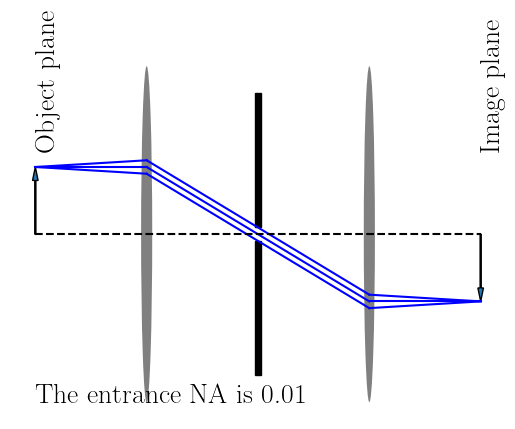

In [3]:
# definition of the 4f system
f1=0.100    # [=] meter
f2=0.100    # [=] meter

object_height = 0.01
# chief_ray angle
fp_aperture_width=0.002
angle=0     # center ray
NA=fp_aperture_width/f1/2

# Creating a plot
fig, ax = plt.subplots()

# Ellipse in data coordinates (units: meters)
# plt.plot(x,y, '-')

# set lens 1
ellipse = Ellipse((f2,0), width=0.01, height=0.05, angle=0, facecolor='grey')
ax.add_patch(ellipse)

# set lens 2
ellipse = Ellipse((2*f1+ f2,0), width=0.01, height=0.05, angle=0, facecolor='grey')
ax.add_patch(ellipse)

# set object
plt.arrow(0, 0, 0, object_height, length_includes_head=True, head_width=0.005, head_length=0.002)

# set aoerture stop
# Create a Rectangle patch

w=0.005 # width of the aperture, for visualization only
rect1 = Rectangle((f1+f2-w/2, fp_aperture_width/2), w, 0.02, linewidth=1, edgecolor='k', facecolor='k')
ax.add_patch(rect1)
rect2 = Rectangle((f1+f2-w/2, -fp_aperture_width/2 - 0.02), w, 0.02, linewidth=1, edgecolor='k', facecolor='k')
ax.add_patch(rect2)

input=np.array((angle, object_height))
input=np.expand_dims(input, 1)

number_of_rays=3
for i in range(number_of_rays):
    ray_angle = angle - NA + (i/(number_of_rays-1))*2*NA
    input=np.array((ray_angle, object_height))
    for j in range(3):
        if j==0:
            propagation =np.array(((1, 0),(f1, 1)))
            C = propagation @ input
            x=(0, f1)
        elif j==1:
            refraction =np.array(((1, -1/f1),(0, 1)))
            propagation = np.array(((1, 0),(f1+f2, 1)))
            C = propagation @ refraction @ input
            x=(f1, 2*f1+f2)
        elif j==2:
            refraction =np.array(((1, -1/f2),(0, 1)))
            propagation = np.array(((1, 0),(f2, 1)))
            C = propagation @ refraction @ input
            x=(2*f1+f2, 2*(f1+f2))

        y = (input[1], C[1])
        input=np.array((C[0], C[1]))

        plt.plot(x,y, '-b')
     

# set image
plt.arrow(2*(f1+f2), 0, 0, y[1], length_includes_head=True, head_width=0.005, head_length=0.002)
plt.plot((0,2*(f1+f2)), (0, 0), '--k')
plt.text(0, 1.3*object_height, 'Object plane', rotation=90)
plt.text(2*(f1+f2), 1.3*object_height, 'Image plane', rotation=90)
nastr='The entrance NA is ' + str(NA)
plt.text(0, -0.025, nastr)
plt.axis('off')
# remove axis
# add object and convolved point as insets and calculate it with Fourier optics

# add more objects, show the Fourier plane image